# 📰 Fake news Detection
**Descrption:** This program uses multiple types of artificial neural network algorithms like "Decison Tree", "Logistic Regression", "Gradient Boost Classifier" and "Random Forest Classifier". To Predict if a news section is Real or Fake.

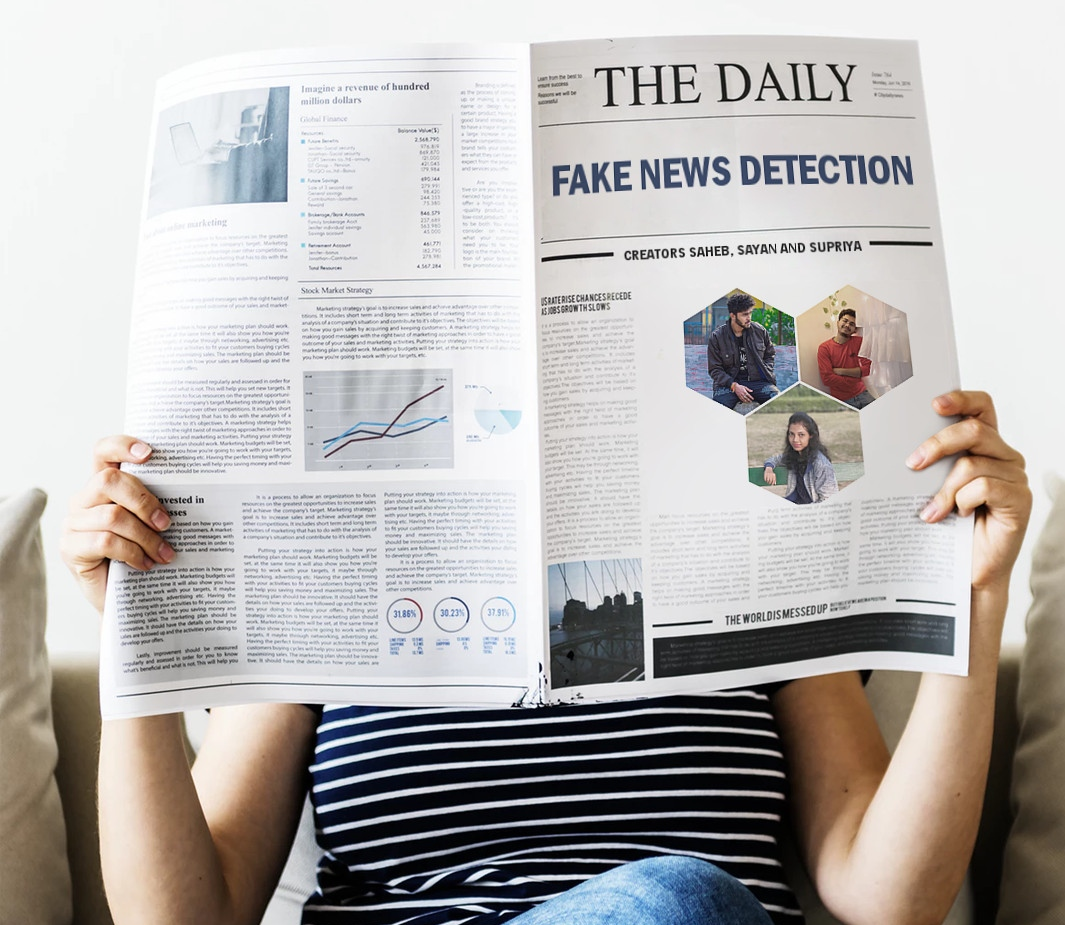

## 💡 1. Problem Defination
Train multiple different neural network in such a way that it could able to predict the probability of a news being Real or Fake.

## 🗂️ 2. Data
We have a collection of combination of **Real News** and **Fake News** Datasets Which we are using to train the Models.

## 📑 3. Evaluation
We would be judging our project based on Mean Accuracy. And Our Objective would be Achieving the score as high as possible.

## 📌 4. Features
We would be focusing on the `text` column of the stock data and would pre-process it and train it on the neural network to predict the future outcome.

## 🎛️ 5. Modelling
To process the Natural Language into a low level language so that it could be further processed by the selected estimator to identify it in which class(0 and 1) it would belong.


## 🖥️ 6. Input Required
Requires a news title(news description) can be achieved from any news website...

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from joblib import load, dump
import project_fake_news

### Inserting fake and real dataset

In [2]:
df_fake = pd.read_csv("./data/Fake.csv")
df_true = pd.read_csv("./data/True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/ President Donald Trump called on the ...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1;

C:\Users\SAHEBM~1\AppData\Local\Temp/ipykernel_7056/1211826965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\SAHEBM~1\AppData\Local\Temp/ipykernel_7056/1211826965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1;


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO Cesar Mata Pires, the owner and co-...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA North Korea and the United States clas...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA North Korea and the United States accu...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN Danish police said on Tuesday the ...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS Two North Korean shipments to ...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON LexisNexis, a provider of legal, regul...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK In the shadow of disused Soviet-era fac...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW Vatican Secretary of State Cardinal Pi...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA Indonesia will buy 11 Sukhoi fighter ...,worldnews,"August 22, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("./data/manual_testing.csv")

Merging the main fake and true dataframe

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [15]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
df = df.sample(frac = 1)

In [18]:
df.head()

,text,class
20032,"BRASILIA Brazilian President Michel Temer, sh...",1
17602,ISTANBUL President Tayyip Erdogan said there ...,1
7876,Billionaire investor Warren Buffett denied on...,1
6692,"Women make up over 50 percent of this country,...",0
1261,After Donald Trump pulled the United States ou...,0


In [19]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns

Index(['text', 'class'], dtype='object')

In [21]:
df.head()

,text,class
0,"BRASILIA Brazilian President Michel Temer, sh...",1
1,ISTANBUL President Tayyip Erdogan said there ...,1
2,Billionaire investor Warren Buffett denied on...,1
3,"Women make up over 50 percent of this country,...",0
4,After Donald Trump pulled the United States ou...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [22]:
# here word drop function was previously written

In [23]:
df["text"] = df["text"].apply(project_fake_news.wordopt)

#### Defining dependent and independent variable as x and y

In [24]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

#### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
dump(vectorization, filename="./models/tfid.joblib")

['./models/tfid.joblib']

### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [30]:
pred_lr=LR.predict(xv_test)

In [31]:
LR_score= LR.score(xv_test, y_test)
LR_score

0.9795008912655971

In [32]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5795
           1       0.98      0.98      0.98      5425

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [33]:
dump(LR, filename="./models/LinearRegression.joblib")

['./models/LinearRegression.joblib']

### 2. Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [36]:
pred_dt = DT.predict(xv_test)

In [37]:
DT_score= DT.score(xv_test, y_test)
DT_score

0.9532976827094474

In [38]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5795
           1       0.96      0.95      0.95      5425

    accuracy                           0.95     11220
   macro avg       0.95      0.95      0.95     11220
weighted avg       0.95      0.95      0.95     11220



In [39]:
dump(DT, filename="./models/DecisionTreeClassifier.joblib")

['./models/DecisionTreeClassifier.joblib']

### 3. Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [42]:
pred_gbc = GBC.predict(xv_test)

In [43]:
GBC_score= GBC.score(xv_test, y_test)
GBC_score

0.9688948306595365

In [44]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5795
           1       0.96      0.97      0.97      5425

    accuracy                           0.97     11220
   macro avg       0.97      0.97      0.97     11220
weighted avg       0.97      0.97      0.97     11220



In [45]:
dump(GBC, filename="./models/GradientBoostingClassifier.joblib")

['./models/GradientBoostingClassifier.joblib']

### 4. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
pred_rfc = RFC.predict(xv_test)

In [49]:
RFC_score=RFC.score(xv_test, y_test)
RFC_score

0.978698752228164

In [50]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5795
           1       0.98      0.98      0.98      5425

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [51]:
dump(GBC, filename="./models/RandomForestClassifier.joblib")

['./models/RandomForestClassifier.joblib']

In [52]:
scores_rec={"Logistic Regression":[round(LR_score*100,2)],
           "Decision Tree":[round(DT_score*100,2)],
           "Greadent Boost":[round(GBC_score*100,2)],
           "Random Forest":[round(RFC_score*100,2)]}

df_score=pd.DataFrame(scores_rec)
df_score.to_csv("./data/df_score.csv",index=False)

# Model Testing With Manual Entry

### News

By just Running the below cells the application will work....

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from joblib import load
import project_fake_news
from datetime import date

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(project_fake_news.wordopt) 
    new_x_test = new_def_test["text"]
    vectorization = load(filename="./models/tfid.joblib")
    new_xv_test = vectorization.transform(new_x_test)
    
    loaded_LR,loaded_DT,loaded_GBC,loaded_RFC=project_fake_news.load_function()
    
    pred_LR = loaded_LR.predict(new_xv_test)
    pred_DT = loaded_DT.predict(new_xv_test)
    pred_GBC = loaded_GBC.predict(new_xv_test)
    pred_RFC = loaded_RFC.predict(new_xv_test)
    
        #predicting the probability of the result
    DT_proba=loaded_DT.predict_proba(new_xv_test)[0][1]
    LR_proba=loaded_LR.predict_proba(new_xv_test)[0][1]
    GBC_proba=loaded_GBC.predict_proba(new_xv_test)[0][1]
    RFC_proba=loaded_RFC.predict_proba(new_xv_test)[0][1]
    
    LR_decision= project_fake_news.output_lable(pred_LR[0]) 
    DT_decision= project_fake_news.output_lable(pred_DT[0]) 
    GBC_decision= project_fake_news.output_lable(pred_GBC[0])
    RFC_decision= project_fake_news.output_lable(pred_RFC[0])
    
    #Creating input values for the output graph
    
    plt.rcParams.update({'font.size': 11.5})
    plt.style.use("seaborn")
    
    #pie chart input values
    prob_percent=round(((DT_proba+LR_proba+GBC_proba+RFC_proba)/4)*100,2)
    exp_val=[prob_percent,100-prob_percent]
    exp_labels=["Real","Fake"]
    myexplode = [0.2, 0]
    txt=f"The Probability of the news being Real according to the system is {prob_percent}%"
    
    
    #news section input value
    s=project_fake_news.news_manager(news)
    
    #models input values
    df_score=pd.read_csv("./data/df_score.csv")
    dic=df_score.to_dict()
    score_value=[]
    model_name=[]
    for i in dic.keys():
        score_value.append(dic[i][0])
        model_name.append(i)
    score_value,model_name
    
    #notice input value
    today = date.today()
    notice_string=f'''● This news was verified on the date of {today}
\n● The average accuracy of the news is {df_score.T[0].sum()/len(df_score.T)}%
\n● The news can be considered real when "Real" probability is 50% or more
\n● The news section can only display 1355 charectors of the provided news.
\n● Individual Model Decision:-
\n     * Logistic Regression Prediction: {LR_decision}
\n     * Decision Tree Prediction: {DT_decision}
\n     * Gradient Boost Classifier Prediction: {GBC_decision}
\n     * Random Forest Classifier Prediction: {RFC_decision}
\n● This Project is created by Saheb Mukherjee
\n● If you also want to try this application visit this link :-https://bit.ly/3og3Wy1'''
    
    #creating subplot axis for the output graph
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
    
    #setting up ax1
    ax1.axis('off')
    ax1.text(0,0.5,s,verticalalignment="center")
    ax1.set_title('The news', fontname="Times New Roman", size=14,fontweight="bold")
    
    #setting up ax2
    ax2.barh(model_name,score_value,color=["salmon","lightblue","teal","pink"])
    for index, value in enumerate(score_value):
        ax2.text(value, index,str(value)+"%")
    ax2.set_title('Models And Accuracy', fontname="Times New Roman", size=14,fontweight="bold")
    
    #setting up axis3
    ax3.pie(exp_val,labels=exp_labels, explode=myexplode,shadow=True)
    ax3.set_title('Probability Pie Chart', fontname="Times New Roman", size=14,fontweight="bold")
#     ax3.legend(["Real", "Fake"], loc='upper left')
    ax3.text(0,-1.21,txt,horizontalalignment='center')
    
    #setting up axis4
    ax4.axis('off')
    ax4.text(0,0.5,notice_string,verticalalignment="center")
#     ax4.set(title="Notice");
    ax4.set_title('Notice', fontname="Times New Roman", size=14,fontweight="bold")
    
    fig.suptitle("Fake News Detection", fontsize=22, fontweight="bold");
    
    fig.savefig(".\Images\Output.jpg",bbox_inches = 'tight')
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(project_fake_news.output_lable_colored(pred_LR[0]), 
                                                                                                              project_fake_news.output_lable_colored(pred_DT[0]), 
                                                                                                              project_fake_news.output_lable_colored(pred_GBC[0]), 
                                                                                                              project_fake_news.output_lable_colored(pred_RFC[0])))

National Security Advisor Ajit Doval on Saturday said that there are some people who create animosity in the name of religion and ideology which affects the entire nation and to counter this, religious leaders will have to work together.  He said that efforts are required to sort out misunderstandings and make every religious body feel part of India.  He made these remarks in the presence of religious leaders from different religions at an interfaith conference organised by All India Sufi Sajjadanashin Council (AISSC) at the Constitution Club here.


LR Prediction: Fake News 
DT Prediction: Real News 
GBC Prediction: Real News 
RFC Prediction: Real News


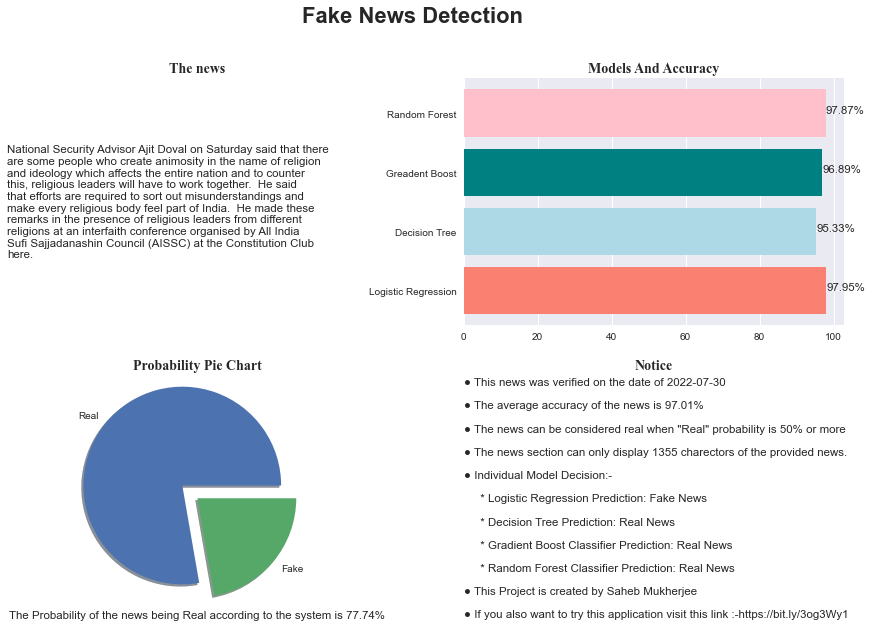

In [54]:
news = str(input())
manual_testing(news)